In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('./657_xz_s_out.csv')
default_rss = 15836.61328

In [14]:
df.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
0,False,False,14082,primary,20,12,16,8,8,36,...,False,True,6413,195621,74,144,5,always,True,15788.08203
1,True,True,49059,disabled,8,2,2,21,11,73,...,True,False,11921,34786,24,361,69,default,False,15922.04688
2,True,False,8471,secondary,5,8,11,25,14,57,...,True,True,3628,92180,49,199,38,always,True,16731.60938
3,False,True,29751,disabled,17,13,7,5,3,15,...,False,False,14774,238546,19,305,54,never,False,15887.50781
4,False,False,43217,disabled,15,9,9,28,16,67,...,True,True,5621,146211,51,263,47,default,True,15922.54297


In [15]:
df.nsmallest(10, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
41,False,False,18150,primary,19,16,16,3,12,4,...,True,False,12074,220017,73,242,53,never,False,15710.86719
46,False,False,14844,primary,9,15,16,1,14,11,...,False,True,2100,217984,10,164,7,never,False,15711.34375
31,True,True,14844,secondary,6,3,15,6,6,11,...,False,True,2100,217984,6,164,14,never,True,15717.30078
47,False,False,19710,primary,2,16,14,4,12,12,...,False,False,14966,54719,72,290,5,never,True,15717.67578
44,True,False,4988,disabled,24,14,7,7,2,4,...,True,False,6318,35768,8,157,41,never,False,15720.63281
19,False,True,38283,secondary,21,4,12,21,6,10,...,True,False,1774,49569,43,192,37,never,False,15722.06250
42,False,True,18150,primary,20,16,16,3,1,4,...,False,False,10201,220017,73,242,53,never,True,15722.31641
25,True,False,1557,disabled,13,7,6,23,4,3,...,False,False,9828,20711,45,169,32,never,True,15722.94922
30,False,False,11902,disabled,4,14,8,21,15,18,...,True,False,5673,201164,24,129,63,never,False,15723.19141
36,False,False,29724,secondary,5,8,8,21,9,28,...,False,True,11846,144250,24,168,10,never,False,15725.00781


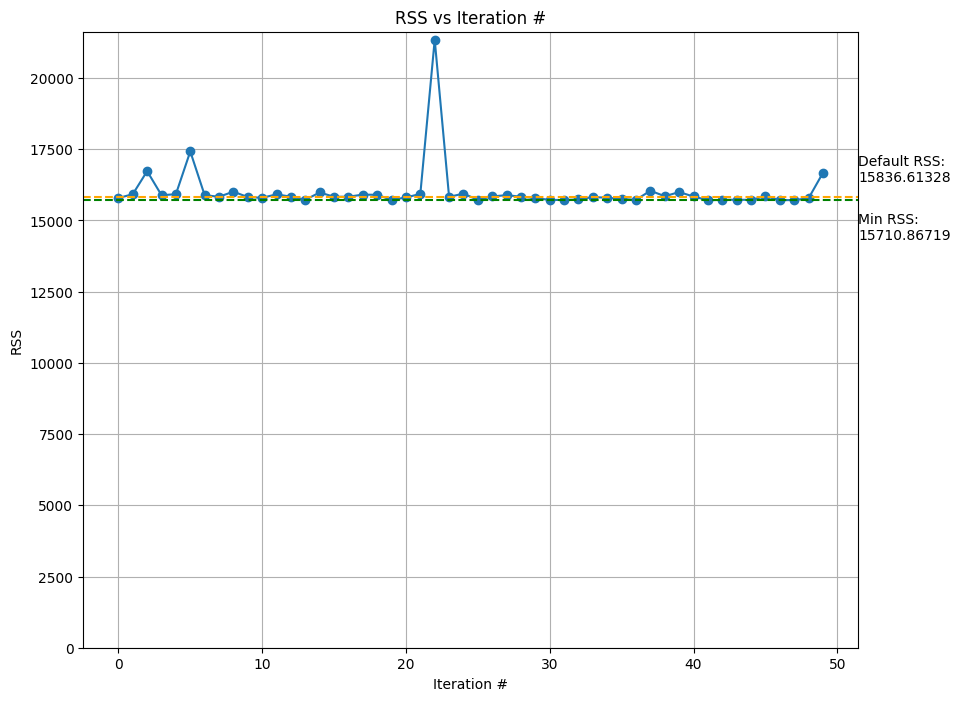

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df['rss'], marker='o')
plt.ylim(bottom=0)

min_rss = df['rss'].min()
vertical_space = abs(default_rss - min_rss)
higher_line = max(default_rss, min_rss)
lower_line = min(default_rss, min_rss)

offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # 2% of y-axis range

if vertical_space < offset * 2:
    plt.axhline(y=default_rss, color='orange', linestyle='--')
    plt.text(plt.xlim()[1], higher_line + offset, f'{"Default" if higher_line == default_rss else "Min"} RSS:\n{higher_line:.5f}', 
             verticalalignment='bottom', 
             horizontalalignment='left')
    
    plt.axhline(y=min_rss, color='green', linestyle='--')
    plt.text(plt.xlim()[1], lower_line - offset, f'{"Default" if lower_line == default_rss else "Min"} RSS:\n{lower_line:.5f}', 
             verticalalignment='top', 
             horizontalalignment='left')

# Customize the plot
plt.title('RSS vs Iteration #')
plt.xlabel('Iteration #')
plt.ylabel('RSS')
plt.grid(True)

# Display the plot
#plt.tight_layout()
plt.show()

In [17]:
percent_diff = 100 * (default_rss - df['rss'].min()) / default_rss
percent_diff

np.float64(0.7940213464630282)